Precision: 0.9841269841269842
Confusion Matrix:
 [[13  0  0]
 [ 0 16  1]
 [ 0  0 20]]
Accuracy: 0.98
Recall: 0.9803921568627452


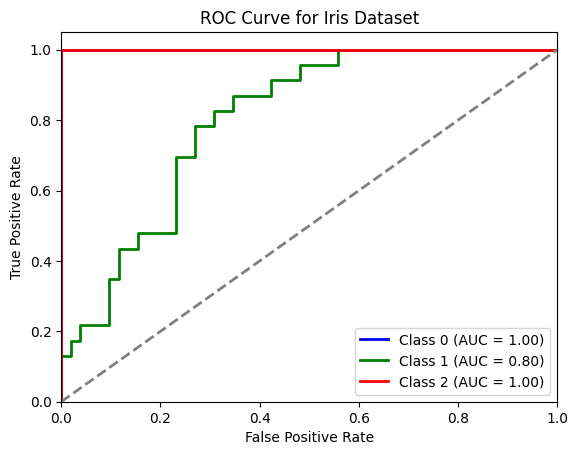

In [5]:
# Step 1: Import the required Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, confusion_matrix, accuracy_score,
    recall_score, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Step 2: Import the Iris Dataset
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (species)
feature_names = iris.feature_names  # Names of the features
target_names = iris.target_names  # Names of the target classes

# Step 3: Create a pandas DataFrame (optional)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add the target variable to the DataFrame
df.head()  # Display the first few rows of the DataFrame

# Step 4: Perform Data Preprocessing (if required)
# Convert Categorical to Numerical Values if applicable
# Check for Null Value
# Divide the dataset into Independent(X) and Dependent(y) variables


encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

# Split the dataset into training and testing datasets
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=105)

# Step 5: Use Logistic regression (Train the Machine) to create and evaluate model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Step 6: Calculate the required evaluation parameters. Define ROC curve and plot it.
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# ROC curve
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = 3

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.5, random_state=42)
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Iris Dataset')
plt.legend(loc="lower right")
plt.show()
